## Model Training

### Data Reading

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
df = pd.read_csv("DATA.csv")

In [94]:
df.head()

,DATE,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,...,new_private_hw_under,p_saving_rate,permit,population,PPI_Cement,PPI_Concrete,target,total_emp_cons,unemployed_rate,mortgage_rate
0,01/01/04,866.4,62.3,11923.447,68.7,1911,9731.8,152.7696,66.1,3.8,...,1191,4.6,1952,292046,149.4,154.4,140.705,6848,5.7,5.87
1,01/02/04,867.3,62.3,11923.447,68.7,1846,9765.4,150.0017,66.0,3.7,...,1197,4.6,1966,292230,149.5,154.4,142.028,6838,5.6,5.72
2,01/03/04,875.7,62.2,11923.447,68.7,1998,9815.8,169.2698,66.0,3.6,...,1219,4.5,2066,292434,150.2,154.4,144.079,6887,5.8,5.59
3,01/04/04,876.2,62.3,12112.815,69.4,2003,9865.8,170.7984,65.9,4.0,...,1222,4.9,2070,292651,152.1,155.6,146.180,6901,5.6,5.52
4,01/05/04,890.8,62.3,12112.815,69.4,1981,9950.0,166.8784,66.0,3.8,...,1233,4.8,2150,292872,153.6,155.6,148.336,6948,5.6,6.12


### Data splitting and Scaling

In [95]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [98]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

C:\Users\golde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.624270192535164, tolerance: 35.041953510354254
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\golde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.09062239698824, tolerance: 35.52067861770589
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\golde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: 

In [99]:
optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0009
Mean Squared Error (MSE): 11.76
RMSE: 3.428576
R-squared (R2): 1.00


### Cross validation

In [100]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

C:\Users\golde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.17550182486775, tolerance: 28.04205834919016
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\golde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.74527894347375, tolerance: 28.04205834919016
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\golde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Ob

Cross-Validation R-squared Scores:
[0.99320408 0.99494386 0.996277   0.99364314 0.99597252]


In [101]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9948
Standard Deviation of R-squared: 0.0012


In [102]:
print(0.1 * rmse)
print(0.1 * df['target'].mean()) # rmse should be less than the 10% of mean of target variable

0.3428575737110147
18.975215352697095


### Most Prominent features and least prominent features

In [103]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [104]:
non_zero_coefficients_df

,Feature,Coefficient
0,all_Const_Emp,29.987316
1,emratio,-11.021002
2,GDP,15.521296
3,home_ow_rate,-0.062129
4,house_st,0.229754
5,income,22.754242
6,IPI_Cement,-1.114277
7,labor_percent,9.305451
8,monthly_supply,3.994601
9,MSPUS,6.210728


In [105]:
zero_coefficients_df

,Feature,Coefficient


### Predicted vs Observed

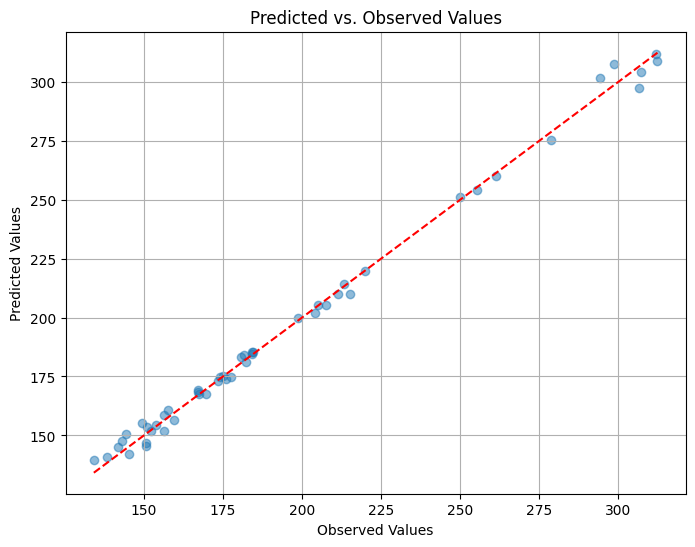

In [106]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()